<a href="https://colab.research.google.com/github/SuKay712/LearnPyTorch/blob/main/02_Neural_Network_classfication_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##02. Neural Network classfication with Pytorch

#1. Make classfication data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles
#make 1000 samples
n_samples = 1000

#create circles
x, y = make_circles(n_samples,
                                noise = 0.03,
                                random_state = 42)
len(x), len(y)

(1000, 1000)

In [3]:
print(f"5 lan lay mau dau tien cuax {x[:5]}"  )
print(f"5 lan lay mau dau tien cuay {y[:5]}"  )

5 lan lay mau dau tien cuax [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
5 lan lay mau dau tien cuay [1 1 1 1 0]


In [4]:
#make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"x1" : x[:, 0],
                                        "x2" : x[:, 1],
                                            "label" : y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


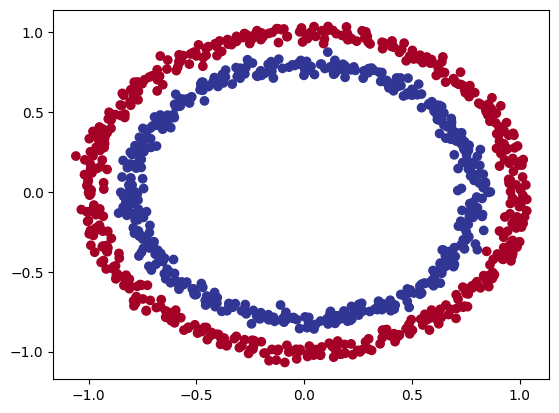

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x = x[:, 0],
                y = x[:, 1],
                c = y,
                cmap = plt.cm.RdYlBu)

##1.1 Check input and output shapes

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
#view the first example of features and labels
x_sample = x[0]
y_sample = y[0]
x_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

In [9]:
import torch
torch.__version__

'2.0.1+cu118'

##1.2 Turn data into tensor and create train test split


In [10]:
#turn data in to tensor
type(x)

numpy.ndarray

In [11]:
#turn data to tensor
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
torch.manual_seed(42)

In [13]:
#split data to trainning data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                                            y,
                                                                            test_size = 0.2,
                                                                            random_state = 42 )

In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

##2.Building a model
Lets build a model to classify our blue  and red dots
to do so, we want to:
1. set up GPU
2. construct a model (nn.module)
3. define a loss function and optimizer
4. creat a training and test loop

In [16]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
x_train.shape

torch.Size([800, 2])

In [18]:
from sklearn import datasets
class CircleModelV0(nn.Module):
    def __init__(self):
         super().__init__()
        #  self.layer_1 = nn.Linear(in_features = 2, out_features = 5) #take 2 in_feauters and up to 5 out_features
        #  self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
         self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features = 2, out_features = 5), #take 2 in_feauters and up to 5 out_features
             nn.Linear(in_features = 5, out_features = 1)
         )
    def forward(self, x):
        return  self.two_linear_layers(x)
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
next(model_0.parameters()).device
next(model_0.parameters()).to(device)

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], device='cuda:0', requires_grad=True)

In [20]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5), #take 2 in_feauters and up to 5 out_features
    nn.Linear(in_features = 5, out_features = 1)
)
model_0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()
x_test.to(device)

tensor([[-3.7519e-01,  6.8266e-01],
        [ 1.5380e-02,  9.6003e-01],
        [-7.0278e-01, -3.1472e-01],
        [-2.8525e-01,  9.6638e-01],
        [ 4.0242e-01, -7.4375e-01],
        [ 6.3228e-01, -5.7111e-01],
        [ 8.5607e-01,  5.4994e-01],
        [ 1.0034e+00,  1.9028e-01],
        [-7.4892e-01, -2.9511e-01],
        [ 5.3780e-02,  9.7388e-01],
        [-4.7020e-01,  7.8749e-01],
        [-2.1686e-01,  7.2418e-01],
        [ 9.7026e-01,  3.6688e-01],
        [-5.8446e-01, -5.7415e-01],
        [-9.1147e-01, -2.4631e-01],
        [ 7.6892e-01, -7.3249e-02],
        [ 3.8408e-01,  6.8299e-01],
        [-6.8364e-01,  7.1417e-01],
        [-5.7777e-01,  5.3652e-01],
        [-8.3274e-01,  4.6625e-01],
        [ 1.2448e-02,  9.8709e-01],
        [ 1.0091e+00, -2.1970e-01],
        [-6.6792e-01,  4.2861e-01],
        [-8.4405e-01,  6.1718e-01],
        [ 6.3680e-01,  7.4591e-01],
        [ 8.9413e-01,  3.6390e-01],
        [-2.3460e-01, -9.6400e-01],
        [ 8.5954e-01, -5.214

In [22]:
#make predictions
untrained_preds = model_0(x_test.to(device))
len(untrained_preds), untrained_preds.shape, x_test, x_test.shape, untrained_preds

(200,
 torch.Size([200, 1]),
 tensor([[-3.7519e-01,  6.8266e-01],
         [ 1.5380e-02,  9.6003e-01],
         [-7.0278e-01, -3.1472e-01],
         [-2.8525e-01,  9.6638e-01],
         [ 4.0242e-01, -7.4375e-01],
         [ 6.3228e-01, -5.7111e-01],
         [ 8.5607e-01,  5.4994e-01],
         [ 1.0034e+00,  1.9028e-01],
         [-7.4892e-01, -2.9511e-01],
         [ 5.3780e-02,  9.7388e-01],
         [-4.7020e-01,  7.8749e-01],
         [-2.1686e-01,  7.2418e-01],
         [ 9.7026e-01,  3.6688e-01],
         [-5.8446e-01, -5.7415e-01],
         [-9.1147e-01, -2.4631e-01],
         [ 7.6892e-01, -7.3249e-02],
         [ 3.8408e-01,  6.8299e-01],
         [-6.8364e-01,  7.1417e-01],
         [-5.7777e-01,  5.3652e-01],
         [-8.3274e-01,  4.6625e-01],
         [ 1.2448e-02,  9.8709e-01],
         [ 1.0091e+00, -2.1970e-01],
         [-6.6792e-01,  4.2861e-01],
         [-8.4405e-01,  6.1718e-01],
         [ 6.3680e-01,  7.4591e-01],
         [ 8.9413e-01,  3.6390e-01],
         

###2.1 set up loss function and optimizer

In [23]:
# loss_fn  = nn.BCELoss() #BCELoss = requires inputs to have gone through the sigmoid activation function prior to input
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsSiLoss = Sigmoid funtion activationj funtion built -in

optimizer = torch.optim.SGD(params = model_0.parameters(),
                                                lr = 0.1)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [25]:
#calculate accuracy - out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


###3. Train model
To train our model

In [26]:
#3.1 Going form rraw logits -> prediction probabilities -> predictions labels
device
next(model_0.parameters()).to(device)
model_0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
#view the first 5 output ò the forward pas on the test data
y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0', grad_fn=<SliceBackward0>)

In [28]:
#use the sigmoid activation function on our model logits to turn them into prediction probability
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [29]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))))[:5]

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

###3.2 building a training

In [31]:
device

'cuda'

In [32]:
!nvidia-smi

Sun Sep 24 14:16:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |    813MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#set the number of epochs
epochs = 100
#put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
#build training and evaluation loop
for epoch in range(epochs):
    ##traininig
    model_0.train()

    #1.Forward pass
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels
    #2. Calculate loss/accuracy
    # loss  = loss_fn(torch.sigmoid(y_logits), ##nn.BCELoss
    #                 y_train)
    loss = loss_fn(y_logits,     ##nn.BCEWithLogitsLoss
                            y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    #3. Opimizer zero grad
    optimizer.zero_grad()
    #4. Loss Backward
    loss.backward()
    #5. Optimizer step(gradient descent)
    optimizer.step()
    ###testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test.to(device)).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,
                                        y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred  = test_pred)
    #print out whats happen
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | loss : {loss: .5f} | acc : {acc: .2f}% | test_loss: {test_loss : .5f} | test_acc: {test_acc:.2f}%" )

epoch: 0 | loss :  0.69796 | acc :  51.88% | test_loss:  0.69440 | test_acc: 58.00%
epoch: 10 | loss :  0.69590 | acc :  51.25% | test_loss:  0.69305 | test_acc: 53.00%
epoch: 20 | loss :  0.69490 | acc :  51.62% | test_loss:  0.69254 | test_acc: 49.50%
epoch: 30 | loss :  0.69435 | acc :  51.12% | test_loss:  0.69236 | test_acc: 49.50%
epoch: 40 | loss :  0.69401 | acc :  50.88% | test_loss:  0.69232 | test_acc: 51.00%
epoch: 50 | loss :  0.69378 | acc :  50.25% | test_loss:  0.69234 | test_acc: 50.00%
epoch: 60 | loss :  0.69362 | acc :  50.00% | test_loss:  0.69239 | test_acc: 51.50%
epoch: 70 | loss :  0.69351 | acc :  50.25% | test_loss:  0.69246 | test_acc: 51.00%
epoch: 80 | loss :  0.69342 | acc :  49.88% | test_loss:  0.69254 | test_acc: 50.00%
epoch: 90 | loss :  0.69336 | acc :  49.88% | test_loss:  0.69262 | test_acc: 53.00%


In [34]:
## 4.Make predictions and evaluate the model
import requests
from pathlib import Path
import matplotlib.pyplot as plt

#download helper funtions
if Path("help_functions.py").is_file():
    print("has exist")
else:
    print( "Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)
from helper_function import plot_predictions, plot_decision_boundary

Download helper_functions.py


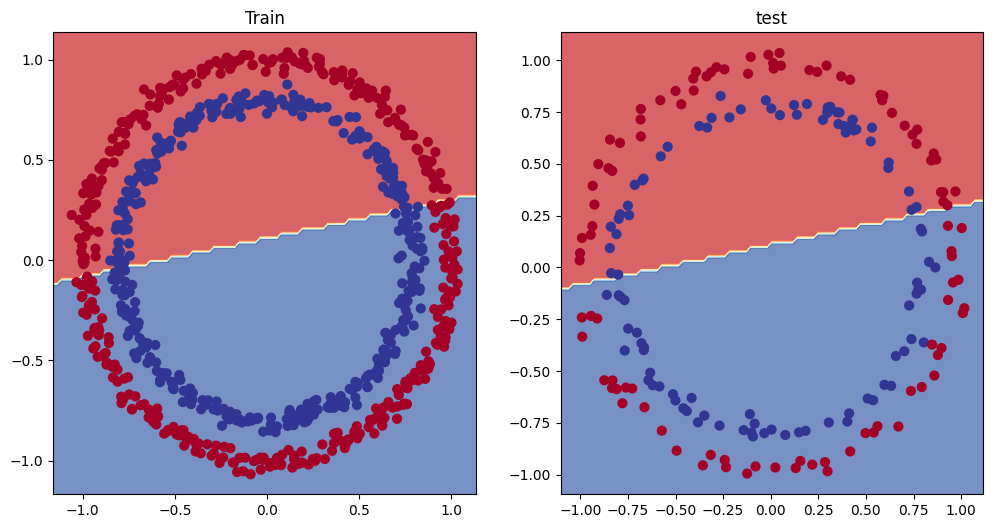

In [35]:
#plot decicsion boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, x_test, y_test)

##5. improve a model(From a model perspective)

In [36]:
model_0.state_dict()
x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [37]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features= 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features= 10, out_features = 1)
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [39]:
#create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                                            lr = 0.1)

In [40]:
#writing a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
#put data on the target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
for epoch in range(epochs):
    ##training
    model_1.train()
    #1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    ##2. Loss/acc
    loss = loss_fn(y_logits,
                        y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    ##3. no grad
    optimizer.zero_grad()
    ##4. Lossbackward
    loss.backward()
    #5. Optimizer step(gradient descent)
    optimizer.step()
    ##Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_lost = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                                                y_pred = test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss : {loss: .5f} | accurary :{acc: .2f}% | TestLoss: {test_loss: .5f} | TestAcc: {test_acc: .2f}% ")

Epoch: 0 | Loss :  0.69396 | accurary : 50.88% | TestLoss:  0.69270 | TestAcc:  51.00% 
Epoch: 100 | Loss :  0.69305 | accurary : 50.38% | TestLoss:  0.69270 | TestAcc:  48.00% 
Epoch: 200 | Loss :  0.69299 | accurary : 51.12% | TestLoss:  0.69270 | TestAcc:  46.00% 
Epoch: 300 | Loss :  0.69298 | accurary : 51.62% | TestLoss:  0.69270 | TestAcc:  45.00% 
Epoch: 400 | Loss :  0.69298 | accurary : 51.12% | TestLoss:  0.69270 | TestAcc:  46.00% 
Epoch: 500 | Loss :  0.69298 | accurary : 51.00% | TestLoss:  0.69270 | TestAcc:  46.00% 
Epoch: 600 | Loss :  0.69298 | accurary : 51.00% | TestLoss:  0.69270 | TestAcc:  46.00% 
Epoch: 700 | Loss :  0.69298 | accurary : 51.00% | TestLoss:  0.69270 | TestAcc:  46.00% 
Epoch: 800 | Loss :  0.69298 | accurary : 51.00% | TestLoss:  0.69270 | TestAcc:  46.00% 
Epoch: 900 | Loss :  0.69298 | accurary : 51.00% | TestLoss:  0.69270 | TestAcc:  46.00% 


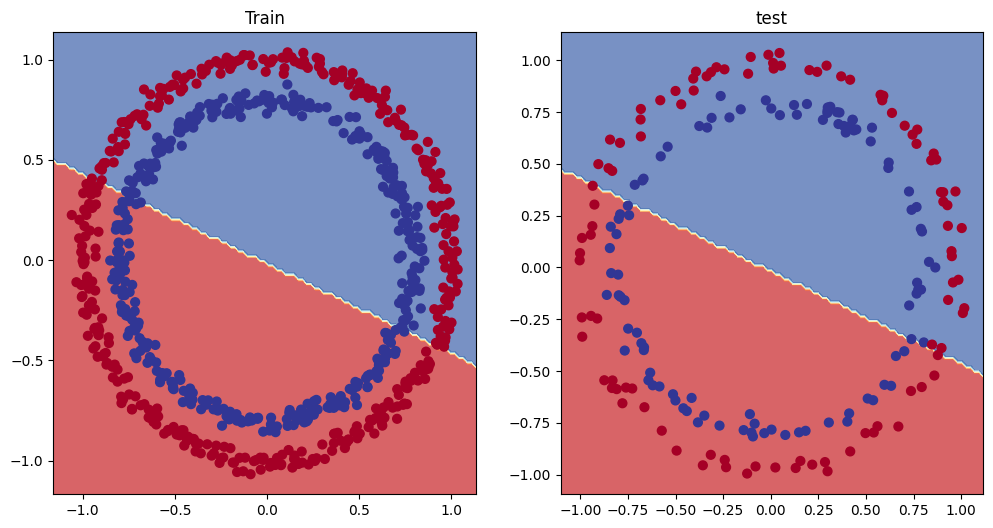

In [41]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, x_test, y_test)

##preparing data to see if our model can fit a straight line

In [42]:
#create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
#create data
x_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * x_regression + bias
#check data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [43]:
#create train and test splits
train_split = int(0.8 * len(x_regression))
x_train_regression, x_test_regression = x_regression[:train_split], x_regression[train_split:]
y_train_regression, y_test_regression = y_regression[:train_split], y_regression[train_split:]
#check length
len(x_train_regression), len(y_train_regression), len(y_test_regression)

(80, 80, 20)

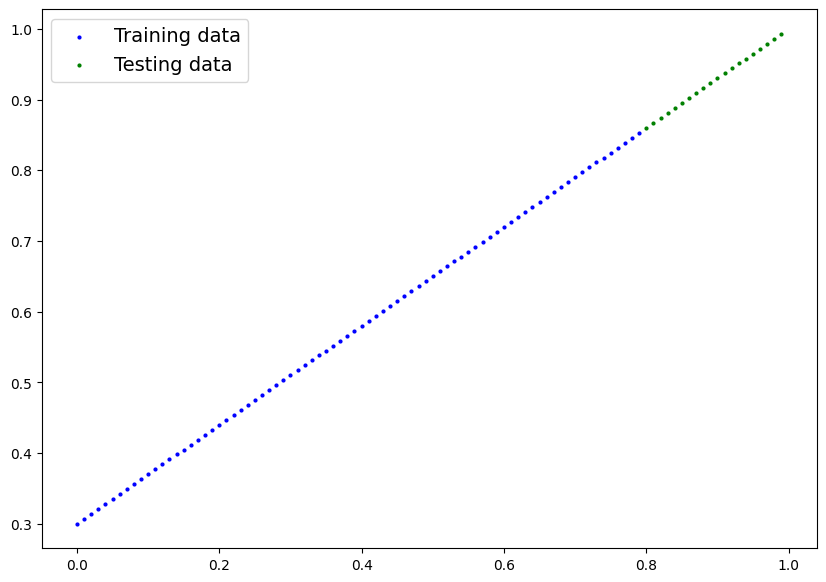

In [44]:
plot_predictions(train_data = x_train_regression,
                            train_labels = y_train_regression,
                            test_data = x_test_regression,
                            test_labels = y_test_regression)

##5.2 adjusting   `model_1` to fit a straint line

In [45]:
#same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features = 1  , out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [46]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
         

In [47]:
#Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.001)

In [48]:
#train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#set the number of epoch
epochs = 1000
#put the data on the target device
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

#Training
for epoch in range(epochs):
    y_pred = model_2(x_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(x_test_regression)
        test_loss = loss_fn(test_pred, x_test_regression)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss :.5f} | Test_Loss: {test_loss : .5f} |")


Epoch: 0 | Loss: 0.75986 | Test_Loss:  0.91815 |
Epoch: 100 | Loss: 0.40272 | Test_Loss:  0.50879 |
Epoch: 200 | Loss: 0.05876 | Test_Loss:  0.10330 |
Epoch: 300 | Loss: 0.01461 | Test_Loss:  0.01860 |
Epoch: 400 | Loss: 0.00308 | Test_Loss:  0.03145 |
Epoch: 500 | Loss: 0.00309 | Test_Loss:  0.03139 |
Epoch: 600 | Loss: 0.00309 | Test_Loss:  0.03132 |
Epoch: 700 | Loss: 0.00299 | Test_Loss:  0.03141 |
Epoch: 800 | Loss: 0.00299 | Test_Loss:  0.03134 |
Epoch: 900 | Loss: 0.00289 | Test_Loss:  0.03143 |


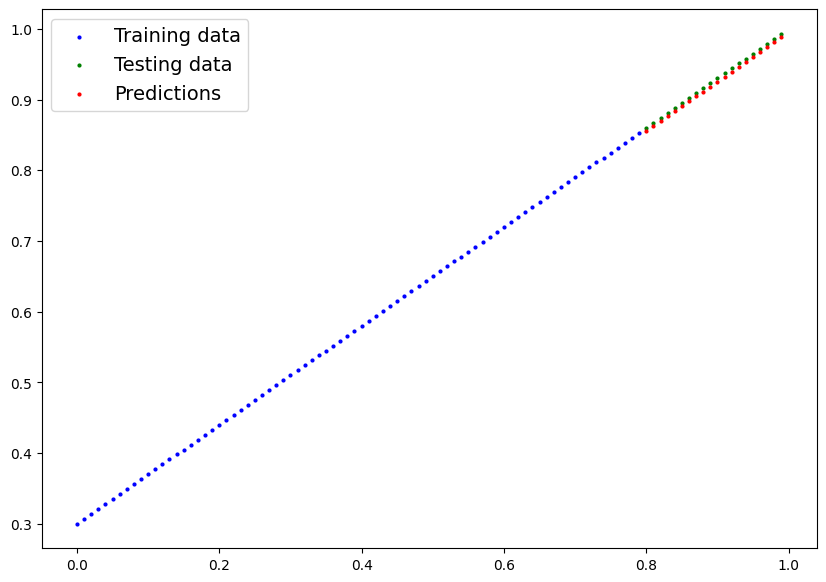

In [49]:
#turn on evaluation mode
model_2.eval()
#make predictions(inference):
with torch.inference_mode():
    y_preds = model_2(x_test_regression)
plot_predictions(train_data = x_train_regression.cpu(),
                            train_labels = y_train_regression.cpu(),
                            test_data = x_test_regression.cpu(),
                            test_labels = y_test_regression.cpu(),
                            predictions = y_preds.cpu() )

##6.The missing piece: non-linearity


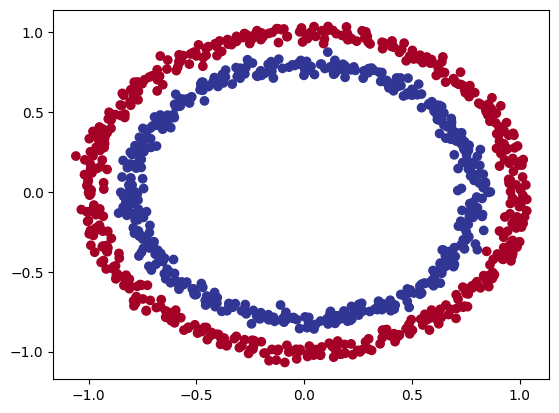

In [50]:
##6.1 Recreating non-linear data(red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples  = 1000

x,y = make_circles(n_samples,
                  noise = 0.03,
                  random_state = 42)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [51]:
#convert data to tensors and then to train the test split
import torch
from sklearn.model_selection import train_test_split
#turn data into tensor
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)
x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

##6.2 Building a model with non-linearity

In [52]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU() ## relu is a non-linear activation function
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                                            lr = 0.1)


In [54]:
##random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
#loop through data
epochs = 1000
for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true  = y_train,
                                y_pred = y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss : {loss: .4f} | Acc: {acc: .5f}% | test_loss : {test_loss: .4f} |test_acc : {test_acc: .5f}%")


Epoch: 0 | Loss :  0.6929 | Acc:  50.00000% | test_loss :  0.6932 |test_acc :  50.00000%
Epoch: 100 | Loss :  0.6912 | Acc:  52.87500% | test_loss :  0.6910 |test_acc :  52.50000%
Epoch: 200 | Loss :  0.6898 | Acc:  53.37500% | test_loss :  0.6894 |test_acc :  55.00000%
Epoch: 300 | Loss :  0.6879 | Acc:  53.00000% | test_loss :  0.6872 |test_acc :  56.00000%
Epoch: 400 | Loss :  0.6852 | Acc:  52.75000% | test_loss :  0.6841 |test_acc :  56.50000%
Epoch: 500 | Loss :  0.6810 | Acc:  52.75000% | test_loss :  0.6794 |test_acc :  56.50000%
Epoch: 600 | Loss :  0.6751 | Acc:  54.50000% | test_loss :  0.6729 |test_acc :  56.00000%
Epoch: 700 | Loss :  0.6666 | Acc:  58.37500% | test_loss :  0.6632 |test_acc :  59.00000%
Epoch: 800 | Loss :  0.6516 | Acc:  64.00000% | test_loss :  0.6476 |test_acc :  67.50000%
Epoch: 900 | Loss :  0.6236 | Acc:  74.00000% | test_loss :  0.6215 |test_acc :  79.00000%


In [55]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01

### 6.4 Evaluating a model trained with non-linear activation function

In [56]:
#make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

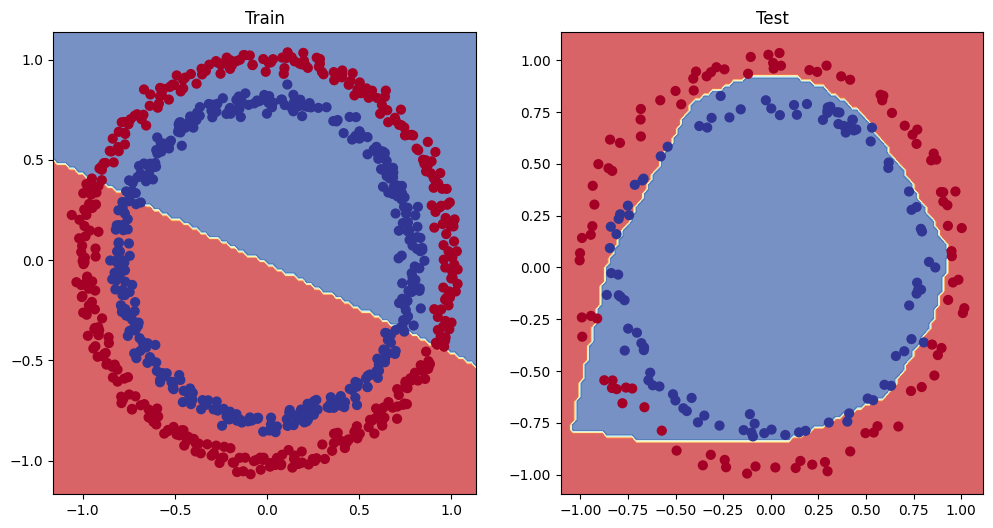

In [57]:
#plot decision boundaries
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)

##replicating model more than 80% accuracy

In [58]:
#create a tensor
A = torch.arange(-10, 10 , 1, dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

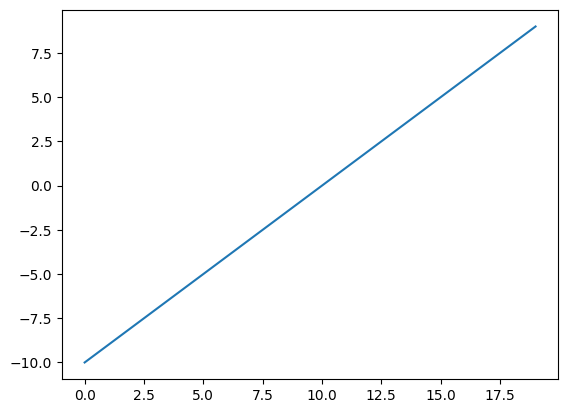

In [59]:
#visualize the tensor
plt.plot(A)

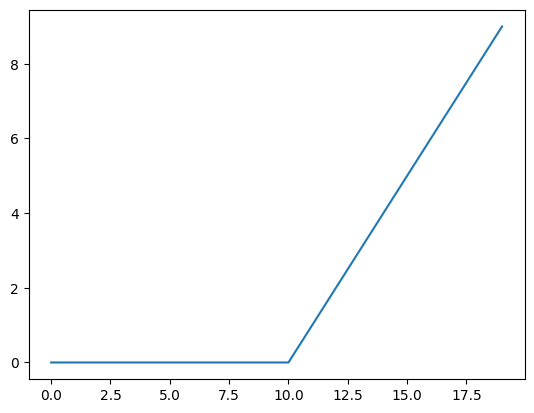

In [60]:
plt.plot(torch.relu(A))

In [61]:
def relu(x) -> torch.Tensor:
    return torch.max(torch.tensor(0), x)  # input is tensor

##8. creating a toy multi-clas dataset


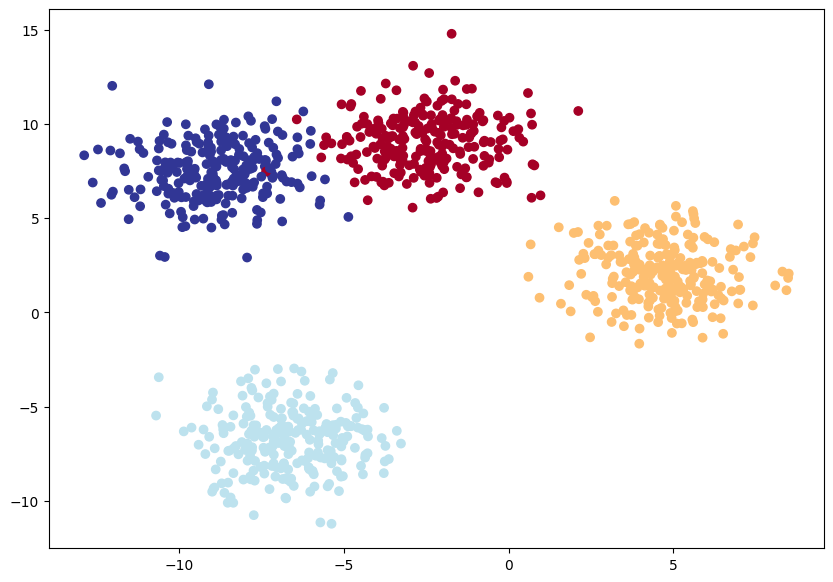

In [62]:
##import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi-class data
x_blob, y_blob = make_blobs(n_samples = 1000,
                                                n_features = NUM_FEATURES,
                                                centers = NUM_CLASSES,
                                                cluster_std = 1.5,
                                                random_state = RANDOM_SEED )
#2. Turn data into tensor
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. Split data
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size = 0.2, random_state = RANDOM_SEED)


#4. Plot data
plt.figure(figsize = (10, 7))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c = y_blob, cmap= plt.cm.RdYlBu)

##8.2 Building a multi-class classification

In [63]:
#create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [64]:
#build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model_4 = BlobModel(input_features =  2, output_features = 4, hidden_units = 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

##8.4 Create LossFunction

In [65]:
#create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

#create an optimizer for multi-class
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1) #learning rate is a hyerparameter you can change


In [66]:
#getting prediction probabilities for a multi-class Pytorch model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(x_blob_test.to(device))
y_logits[:10]
# y_blob_test[:10]


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [67]:
#convert our model's logit outputs to prediction probabilities
y_preds_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_preds_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [68]:
#convert our model's prediction probabilities
y_preds = torch.argmax(y_preds_probs, dim = 1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [69]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

##8.5 training loop for multi-class


In [70]:
# FIt the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs = 100
#put the data to target device
x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

#loop through data
for epoch in range(epochs):
    ###training
    model_4.train()

    y_logits = model_4(x_blob_train)
    y_pred = torch.softmax(y_logits, dim = 1).argmax(dim =1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_pred = y_pred, y_true = y_blob_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ##Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(x_blob_test)
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        test_loss = loss_fn(test_logits,
                                        y_blob_test)
        test_acc  = accuracy_fn(y_true = y_blob_test,
                                        y_pred = test_preds)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss:{loss:.5f} | Acc: {acc: .2f}% | Test_Loss: {test_loss: .5f} | Test_Acc: {test_acc: .2f}% ")


Epoch: 0 | Loss:1.04324 | Acc:  65.50% | Test_Loss:  0.57861 | Test_Acc:  95.50% 
Epoch: 10 | Loss:0.14398 | Acc:  99.12% | Test_Loss:  0.13037 | Test_Acc:  99.00% 
Epoch: 20 | Loss:0.08062 | Acc:  99.12% | Test_Loss:  0.07216 | Test_Acc:  99.50% 
Epoch: 30 | Loss:0.05924 | Acc:  99.12% | Test_Loss:  0.05133 | Test_Acc:  99.50% 
Epoch: 40 | Loss:0.04892 | Acc:  99.00% | Test_Loss:  0.04098 | Test_Acc:  99.50% 
Epoch: 50 | Loss:0.04295 | Acc:  99.00% | Test_Loss:  0.03486 | Test_Acc:  99.50% 
Epoch: 60 | Loss:0.03910 | Acc:  99.00% | Test_Loss:  0.03083 | Test_Acc:  99.50% 
Epoch: 70 | Loss:0.03643 | Acc:  99.00% | Test_Loss:  0.02799 | Test_Acc:  99.50% 
Epoch: 80 | Loss:0.03448 | Acc:  99.00% | Test_Loss:  0.02587 | Test_Acc:  99.50% 
Epoch: 90 | Loss:0.03300 | Acc:  99.12% | Test_Loss:  0.02423 | Test_Acc:  99.50% 


##8.6 making and evaluating predictions with a Pytorch multi

In [71]:
#make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(x_blob_test)
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [72]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [73]:
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

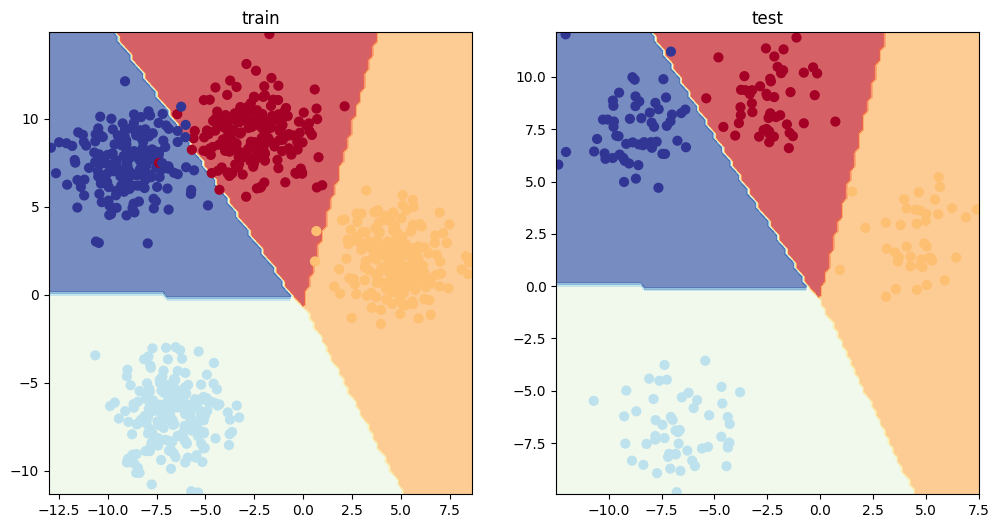

In [74]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)

##9. A few more classification metrics... (to evaluate our classsification model)

In [75]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.2 MB/s eta 0:00:00


In [85]:
from torchmetrics import Accuracy

#setup metric
torchmetrics_accuracy = Accuracy(task='multiclass',
                                     num_classes=4).to(device)
#calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [86]:
torchmetrics_accuracy.device

device(type='cuda', index=0)